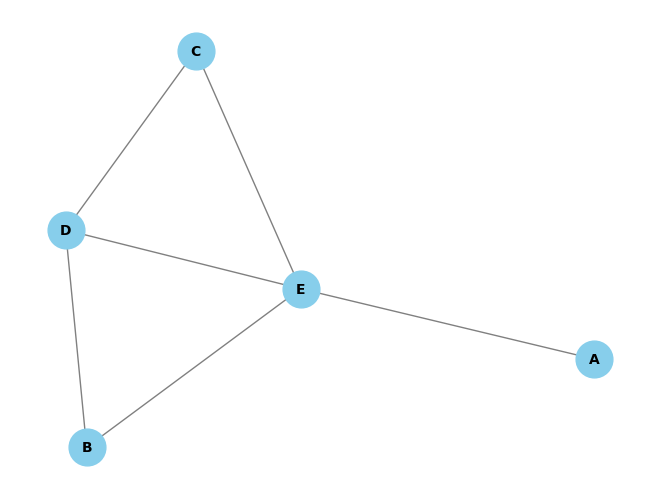

In [5]:
from platform import node
import networkx as nx
import matplotlib.pyplot as plt

G=nx.Graph()

nodes=['A','B','C','D','E']
G.add_nodes_from(nodes)

edges=[('A', 'E'), ('B', 'E'), ('B', 'D'), ('C', 'D'), ('C', 'E'), ('D', 'E')]
G.add_edges_from(edges)

pos=nx.spring_layout(G)
nx.draw(G,pos,with_labels=True,font_weight="bold",node_size=700,node_color="skyblue",font_size=10, edge_color="gray")


In [7]:
import numpy as np
adj_matrix=nx.adjacency_matrix(G)

degree_matrix=np.diag(list(dict(G.degree).values()))

print(adj_matrix.toarray())

print(degree_matrix)

[[0 0 0 0 1]
 [0 0 0 1 1]
 [0 0 0 1 1]
 [0 1 1 0 1]
 [1 1 1 1 0]]
[[1 0 0 0 0]
 [0 2 0 0 0]
 [0 0 2 0 0]
 [0 0 0 3 0]
 [0 0 0 0 4]]


In [9]:
for node in nodes:
    G.add_edge(node,node)


adj_matrix=nx.adjacency_matrix(G)

degree_matrix=np.diag(list(dict(G.degree()).values()))

print("邻接矩阵:")
print(adj_matrix.toarray())

print("\n度矩阵:")
print(degree_matrix)

邻接矩阵:
[[1 0 0 0 1]
 [0 1 0 1 1]
 [0 0 1 1 1]
 [0 1 1 1 1]
 [1 1 1 1 1]]

度矩阵:
[[3 0 0 0 0]
 [0 4 0 0 0]
 [0 0 4 0 0]
 [0 0 0 5 0]
 [0 0 0 0 6]]


In [10]:
A_title=adj_matrix.toarray()
D_title=np.diag(np.array(list(dict(G.degree()).values()))-1)

print(A_title)
print(D_title)



[[1 0 0 0 1]
 [0 1 0 1 1]
 [0 0 1 1 1]
 [0 1 1 1 1]
 [1 1 1 1 1]]
[[2 0 0 0 0]
 [0 3 0 0 0]
 [0 0 3 0 0]
 [0 0 0 4 0]
 [0 0 0 0 5]]


In [13]:
np.linalg.inv(D_title)

array([[0.5       , 0.        , 0.        , 0.        , 0.        ],
       [0.        , 0.33333333, 0.        , 0.        , 0.        ],
       [0.        , 0.        , 0.33333333, 0.        , 0.        ],
       [0.        , 0.        , 0.        , 0.25      , 0.        ],
       [0.        , 0.        , 0.        , 0.        , 0.2       ]])

In [14]:
np.linalg.inv(D_title)@A_title

array([[0.5       , 0.        , 0.        , 0.        , 0.5       ],
       [0.        , 0.33333333, 0.        , 0.33333333, 0.33333333],
       [0.        , 0.        , 0.33333333, 0.33333333, 0.33333333],
       [0.        , 0.25      , 0.25      , 0.25      , 0.25      ],
       [0.2       , 0.2       , 0.2       , 0.2       , 0.2       ]])

In [15]:
np.linalg.inv(D_title)@A_title@np.linalg.inv(D_title)

array([[0.25      , 0.        , 0.        , 0.        , 0.1       ],
       [0.        , 0.11111111, 0.        , 0.08333333, 0.06666667],
       [0.        , 0.        , 0.11111111, 0.08333333, 0.06666667],
       [0.        , 0.08333333, 0.08333333, 0.0625    , 0.05      ],
       [0.1       , 0.06666667, 0.06666667, 0.05      , 0.04      ]])

In [16]:
np.linalg.inv(np.sqrt(D_title))@A_title@np.linalg.inv(np.sqrt(D_title))

array([[0.5       , 0.        , 0.        , 0.        , 0.31622777],
       [0.        , 0.33333333, 0.        , 0.28867513, 0.25819889],
       [0.        , 0.        , 0.33333333, 0.28867513, 0.25819889],
       [0.        , 0.28867513, 0.28867513, 0.25      , 0.2236068 ],
       [0.31622777, 0.25819889, 0.25819889, 0.2236068 , 0.2       ]])